<a href="https://colab.research.google.com/github/nawafalnaqbi/FDS/blob/main/Nawaf_Alnaqbi_AirQuality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In-Class Team-Based Learning Activity** : Analyzing California Air Quality Data **[5 MARKS]**
- Objective:
    - In this activity, YOU will work in teams to analyze the California Air Quality 2020 dataset. Download it from the following link:
    [California Air Quality Data](https://www.kaggle.com/datasets/thaddeussegura/california-air-quality-2020-through-sept10th)

    -  columns:
      - `Date`: The date of the measurement.
      - `Daily Mean PM2.5 Concentration`: Average PM2.5 concentration for the day.
      - `AQI`: Air Quality Index derived from PM2.5 levels.
      - `CBSA Name`: Core-Based Statistical Area (e.g., Fresno, Riverside).
      - `County Name`: County where the measurement was taken.
      - Other metadata like `latitude`, `longitude`, and units.
    
    - You will:
      - Explore the dataset to understand its structure.
      - Perform operations such as sorting, filtering, and selecting rows to extract meaningful insights.
      - Collaborate to answer questions about air quality trends and their implications.

In [ ]:
from datascience import *
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving California_airquality.csv to California_airquality.csv


**Step-by-Step Instructions**
- **Step 1**: Introduction to the Dataset
    - Goal : Familiarize yourself with the dataset and its columns.
      - **Task 1.1**: Load the dataset into a `table` and display the first few rows.

In [ ]:
CA = Table.read_table('California_airquality.csv')

In [ ]:
CA.show(5)

Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
1/1/20,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
1/2/20,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
1/3/20,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
1/4/20,AQS,60010007,3,10.9,ug/m3 LC,45,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
1/5/20,AQS,60010007,3,7.8,ug/m3 LC,33,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784


**Step 2**: Sorting Rows
  - Goal : Teach students how to sort rows based on specific criteria.
    - **Task 2.1** : Sort the dataset by Daily Mean PM2.5 Concentration in descending order to find the days with the worst air quality.

In [ ]:
CA_worst_air_quality=CA.sort('Daily Mean PM2.5 Concentration', descending=True)
CA_worst_air_quality.show(5)

Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
8/21/20,AirNow,60871005,3,378.5,ug/m3 LC,419,San Lorenzo Valley Middle School,1,100,88101,PM2.5 - Local Conditions,42100,"Santa Cruz-Watsonville, CA",6,California,87,Santa Cruz,37.0632,-122.083
8/20/20,AirNow,60798002,3,304.1,ug/m3 LC,354,Atascadero,1,100,88101,PM2.5 - Local Conditions,42020,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",6,California,79,San Luis Obispo,35.4945,-120.666
8/29/20,AQS,60631006,4,276.8,ug/m3 LC,327,Quincy-N Church Street,1,100,88502,Acceptable PM2.5 AQI & Speciation Mass,nan,nan,6,California,63,Plumas,39.9396,-120.944
9/10/20,AirNow,60431001,3,263.3,ug/m3 LC,314,Yosemite NP-Yosemite Village Vistor Center,1,100,88502,Acceptable PM2.5 AQI & Speciation Mass,nan,nan,6,California,43,Mariposa,37.7487,-119.587
8/25/20,AQS,60631006,4,251.5,ug/m3 LC,302,Quincy-N Church Street,1,100,88502,Acceptable PM2.5 AQI & Speciation Mass,nan,nan,6,California,63,Plumas,39.9396,-120.944


**Teams should discuss why certain days might have had poor air quality (e.g., wildfires)!**


- **Task 2.2** : Sort the dataset alphabetically by `CBSA_NAME` to group data by region.



In [ ]:
CBSA_NAME_sort_alphabetically=CA.sort('CBSA_NAME', descending=False)
CBSA_NAME_sort_alphabetically.show(5)

Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
1/1/20,AQS,60290010,1,36.8,ug/m3 LC,104,Bakersfield-Golden/M St,1,100,88101,PM2.5 - Local Conditions,12540,"Bakersfield, CA",6,California,29,Kern,35.3856,-119.015
1/4/20,AQS,60290010,1,23.7,ug/m3 LC,75,Bakersfield-Golden/M St,1,100,88101,PM2.5 - Local Conditions,12540,"Bakersfield, CA",6,California,29,Kern,35.3856,-119.015
1/10/20,AQS,60290010,1,18.5,ug/m3 LC,64,Bakersfield-Golden/M St,1,100,88101,PM2.5 - Local Conditions,12540,"Bakersfield, CA",6,California,29,Kern,35.3856,-119.015
1/13/20,AQS,60290010,1,15.1,ug/m3 LC,57,Bakersfield-Golden/M St,1,100,88101,PM2.5 - Local Conditions,12540,"Bakersfield, CA",6,California,29,Kern,35.3856,-119.015
1/16/20,AQS,60290010,1,21,ug/m3 LC,70,Bakersfield-Golden/M St,1,100,88101,PM2.5 - Local Conditions,12540,"Bakersfield, CA",6,California,29,Kern,35.3856,-119.015


**Step 3**: Selecting Rows
  - Goal : Practice filtering rows based on specific conditions.
      - **Task 3.1** : Extract rows where the Daily Mean PM2.5 Concentration exceeds 50 µg/m³.

In [ ]:
CA_above_50=CA.where('Daily Mean PM2.5 Concentration', are.above(50))
CA_above_50.show(5)

Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
8/20/20,AirNow,60010007,3,63.4,ug/m3 LC,155,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
8/21/20,AirNow,60010007,3,54.5,ug/m3 LC,148,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
8/23/20,AirNow,60010007,3,99.9,ug/m3 LC,174,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
8/24/20,AirNow,60010007,3,57.9,ug/m3 LC,152,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784
9/10/20,AirNow,60010007,3,53.8,ug/m3 LC,146,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784


**Teams should count how many such days occurred and discuss the health implications.**

- **Task 3.2** : Find all rows corresponding to `Fresno, CA`.

In [ ]:
CA_CBSA_NAME_Fr=CA.where('CBSA_NAME', 'Fresno, CA')
CA_CBSA_NAME_Fr.show(5)

Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
1/1/20,AQS,60190011,1,42.3,ug/m3 LC,118,Fresno - Garland,1,100,88101,PM2.5 - Local Conditions,23420,"Fresno, CA",6,California,19,Fresno,36.7854,-119.773
1/2/20,AQS,60190011,1,35.9,ug/m3 LC,102,Fresno - Garland,1,100,88101,PM2.5 - Local Conditions,23420,"Fresno, CA",6,California,19,Fresno,36.7854,-119.773
1/3/20,AQS,60190011,1,29.6,ug/m3 LC,88,Fresno - Garland,1,100,88101,PM2.5 - Local Conditions,23420,"Fresno, CA",6,California,19,Fresno,36.7854,-119.773
1/4/20,AQS,60190011,1,9.4,ug/m3 LC,39,Fresno - Garland,1,100,88502,Acceptable PM2.5 AQI & Speciation Mass,23420,"Fresno, CA",6,California,19,Fresno,36.7854,-119.773
1/5/20,AQS,60190011,1,13.8,ug/m3 LC,55,Fresno - Garland,1,100,88101,PM2.5 - Local Conditions,23420,"Fresno, CA",6,California,19,Fresno,36.7854,-119.773


**Teams should calculate the average PM2.5 concentration for Fresno during this period.**

**Step 4**: Creating New Columns
- Goal : Teach students how to compute new metrics and add them to the table
    - **Task 4.1** : Add a column indicating whether the air quality is `"Good" (PM2.5 < 12)`, `"Moderate" (12 ≤ PM2.5 < 35)`, or `"Unhealthy" (PM2.5 ≥ 35)`.

In [ ]:
def categorize_air_quality(pm25):
    if pm25 < 12:
        return 'Good'
    elif 12 <= pm25 < 35:
        return 'Moderate'
    else:
        return 'Unhealthy'

air_quality = CA.apply(categorize_air_quality, 'Daily Mean PM2.5 Concentration')
CA_air_quality = CA.with_column('Air Quality', air_quality)
CA_air_quality.show(5)

Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Air Quality
1/1/20,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784,Good
1/2/20,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784,Good
1/3/20,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784,Moderate
1/4/20,AQS,60010007,3,10.9,ug/m3 LC,45,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784,Good
1/5/20,AQS,60010007,3,7.8,ug/m3 LC,33,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.6875,-121.784,Good


**Task 4.2** : Calculate the percentage of days in each category for Fresno.


In [ ]:
CA_air_quality_fresno = CA_air_quality.where('CBSA_NAME', 'Fresno, CA')

category_counts = CA_air_quality_fresno.group('Air Quality').with_column('Percentage', CA_air_quality_fresno.group('Air Quality').column('count') / CA_air_quality_fresno.num_rows * 100)

category_counts.show(3)

Air Quality,count,Percentage
Good,1259,73.3683
Moderate,382,22.2611
Unhealthy,75,4.37063


**Step 5**: Group Challenge
- Goal :  solve a complex problem.
    - **Challenge** : Identify the top 3 regions (CBSA Names) with the highest average PM2.5 concentrations

In [ ]:
CA_mean_pm25_by_cbsa = CA.group('CBSA_NAME', np.mean)
CA_mean_pm25_by_cbsa2=CA_mean_pm25_by_cbsa.select('CBSA_NAME', 'Daily Mean PM2.5 Concentration mean')
CA_mean_pm25_by_cbsa2.show(5)

top_3_regions = CA_mean_pm25_by_cbsa2.sort('Daily Mean PM2.5 Concentration mean', descending=True).take(np.arange(3))

top_3_regions.show(3)

CBSA_NAME,Daily Mean PM2.5 Concentration mean
"Bakersfield, CA",10.0654
"Bishop, CA",7.13315
"Chico, CA",9.99505
"Clearlake, CA",3.46667
"Crescent City, CA",6.99727


CBSA_NAME,Daily Mean PM2.5 Concentration mean
"Hanford-Corcoran, CA",18.794
"Visalia-Porterville, CA",14.5251
"Madera, CA",12.5733


**Grading Distribution (Out of 5)**
- Below is the grading rubric for the tasks in the activity.
    - Each task will be graded based on correctness, completeness, and clarity of the solution.

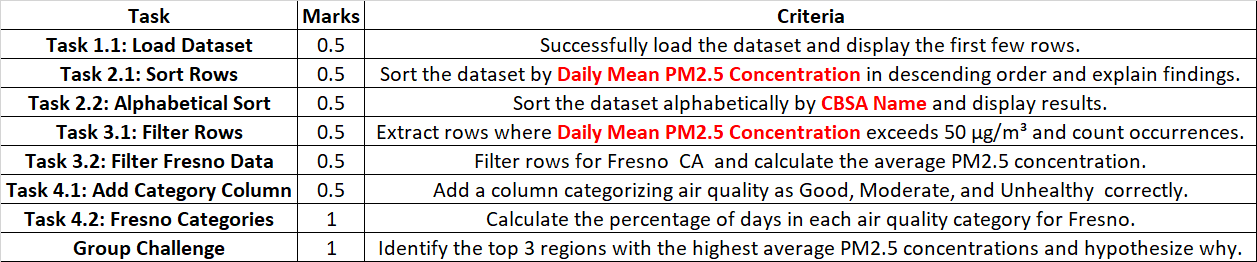

# **Submission Instructions**



- **1. File Requirements**
  - **File Name** : Save your Jupyter Notebook as Group_Name_AirQuality_Analysis.ipynb. Replace Group_Name with your assigned group name.
  - **Self-Contained** : Ensure the notebook is self-contained, meaning it includes all necessary code, outputs, and explanations. Use Markdown cells to describe your steps and findings.
  - **Colab Compatibility** : Test that your notebook can be opened and run using "Open in Colab" by including a link to your GitHub repository in the notebook's first cell:

    - [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your_username/your_repo/blob/main/Group_Name_AirQuality_Analysis.ipynb)
      - Replace your_username, your_repo, and Group_Name with your actual GitHub username, repository name, and group name.
- **2. Group Information**
Include the group name and member names at the top of the notebook in a Markdown cell:

# Group Name: [Your Group Name]
## Members:
- Member 1 Name
- Member 2 Name
- Member 3 Name

- **3. Submission Process**
  - GitHub Repository :
    - Create a public GitHub repository for your group (if not already created)
    - Upload your completed Jupyter Notebook (Group_Name_AirQuality_Analysis.ipynb) to the repository.
    - Ensure the repository contains a README.md file with the following:
      - A brief description of the project.
      - Instructions for opening the notebook in Colab.
  - Blackboard Submission :
    - Submit the link to your GitHub repository on Blackboard.
    - Additionally, upload the .ipynb file directly to Blackboard as a backup.